# Applications to COVID-19 Spike Protein Data

Use this curl to download the same data I used:

```
curl --header 'Host: www.ncbi.nlm.nih.gov' --user-agent 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/112.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.ncbi.nlm.nih.gov/labs/virus/vssi/' --header 'Content-Type: application/x-www-form-urlencoded' --header 'Origin: https://www.ncbi.nlm.nih.gov' --header 'DNT: 1' --cookie 'ncbi_sid=5AAB7C471D0A93D1_0000SID; books.article.report=; pmc-frontend-csrftoken=iNqlabQKu31USqKaaP9hlSZTivQtphaEXkS1yjrTVZhDE1LrccjhiUrhgBQBJ9WL; _ga_DP2X732JSX=GS1.1.1684345225.3.1.1684345624.0.0.0; _ga=GA1.1.2121857620.1684207070; QSI_SI_0iiXVgeMqGRzRFc_intercept=true; WebEnv=10Sk__%405AAB7C471D0A93D1_0000SID; ncbi_pinger=N4IgDgTgpgbg+mAFgSwCYgFwgJwGZsBCADAEy4CsRBuuAYjZUU7gBwAiAbACwCCAwgJYBGLgDohogLZwhIADQgAxgBtkigNYA7KAA8ALplAlMIGMggBXAM4BaGAEMIye3uQB7TTdQAreSFwmflwmAI4WUBAAngAEAEYWyMqoERjRMFZWyH7kgQoiJmD2AOZQcGZQAO5+JEQmeISkFFQ09E1MRKycvAJ8wmIS0rIKJLJYZpa2Dk4u7p4+GAByAPILAKIYYREx8YnJEKnpmYsrq9XGWBWXopqKscjXypLXyIiiRW4w1dgmQixMfrhalghEION8FLhRiBfv8IedoUISDkId9gRwSNwWEEgdD0dhyBwggEsERRKxRMYFFxglgVGotLoDFSclgAOyUkDkYnQ1nYWoKcg06EdWoAX1FQA=' --header 'Upgrade-Insecure-Requests: 1' --header 'Sec-Fetch-Dest: document' --header 'Sec-Fetch-Mode: navigate' --header 'Sec-Fetch-Site: same-origin' --header 'Sec-Fetch-User: ?1' --request POST --data-urlencode 'q=*:*' --data-urlencode 'fq=' 'https://www.ncbi.nlm.nih.gov/genomes/VirusVariation/vvsearch2/?fq=%7B!tag=SeqType_s%7DSeqType_s:(%22Nucleotide%22)&fq=VirusLineageId_ss:(2697049)&fq=%7B!tag=BaselineSurveillance_s%7D%20NOT%20BaselineSurveillance_s:*&fq=%7B!tag=Region_s%7DRegion_s:(%22North%20America%22)&fq=%7B!tag=Completeness_s%7DCompleteness_s:(%22complete%22)&cmd=download&sort=SourceDB_s%20desc,CreateDate_dt%20desc,id%20asc&dlfmt=fasta&fl=AccVer_s,Definition_s,Lineage_s,Nucleotide_seq' --output 'sequences.fasta'
```

Then run spike_prot_extractor.py to generate spike_prots.fasta

In [8]:
from SeqRep.dataset_builder import DatasetBuilder, COVIDDataParser
builder = DatasetBuilder(COVIDDataParser())
dataset = builder.from_fasta(['COVID-Data/spike_prots.fasta'])

ImportError: cannot import name 'COVIDDataParser' from 'SeqRep.dataset_builder' (/work/08947/nkalidas/ls6/SeqRep/SeqRep/dataset_builder.py)

In [2]:
import numpy as np
kmer_counts = dataset.count_kmers(5, jobs=7, chunksize=1000)

100%|██████████| 210524/210524 [00:11<00:00, 18756.05it/s]


In [3]:
from SeqRep.encoders import ModelBuilder
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
builder = ModelBuilder(1024, distribute_strategy=strategy)
builder.dense(512)
builder.dense(512)
builder.dense(512)
builder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
Total params: 1,050,112
Trainable params: 1,050,112
Non-trainable params: 0
_________________________________________________________________


2023-06-21 17:09:42.248945: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/apps/cuda11_4/nccl/2.11.4/lib:/opt/apps/cuda11_4/cudnn/8.2.4/lib64:/opt/apps/cuda/11.4/lib64:/opt/apps/pmix/3.2.3/lib:/opt/apps/intel19/python3/3.9.7/lib:/opt/intel/compilers_and_libraries_2020.4.304/linux/mpi/intel64/libfabric/lib:/opt/intel/compilers_and_libraries_2020.4.304/linux/mpi/intel64/lib/release:/opt/intel/compilers_and_libraries_2020.4.304/linux/mpi/intel64/lib:/opt/intel/debugger_2020/libipt/intel64/lib:/opt/intel/compilers_and_libraries_2020.1.217/linux/daal/lib/intel64_lin:/opt/intel/compilers_and_libraries_2020.1.217/linux/tbb/lib/intel64_lin/gcc4.8:/opt/intel/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin:/opt/intel/compilers_and_libraries_2020.1.217/linux/ipp/lib/intel64:/opt/intel/compilers_and_libraries_2020.1.217

In [4]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import euclidean
dense_comp = ComparativeEncoder.from_model_builder(builder, dist=euclidean, output_dim=2)

In [5]:
dense_comp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 1,051,138
Trainable params: 1,051,138
Non-tra

In [5]:
dense_comp.fit(kmer_counts, batch_size=100, epochs=7, jobs=64, chunksize=100)

Epoch 1:


100%|██████████| 210524/210524 [00:07<00:00, 30028.52it/s]
2023-05-18 10:33:40.312090: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2106/2106 [==============================] - 16s 5ms/step - loss: 0.1008
Epoch time: 31.766083240509033
Epoch 2:


100%|██████████| 210524/210524 [00:03<00:00, 60738.06it/s]


2106/2106 [==============================] - 11s 5ms/step - loss: 0.0955
Epoch time: 23.42664098739624


In [8]:
dense_comp.save('Models/covid_densenet')

In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
dense_comp = ComparativeEncoder.load('Models/covid_densenet')

In [7]:
dense_comp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 1,051,138
Trainable params: 1,051,138
Non-tra

In [4]:
dense_reprs = dense_comp.transform(kmer_counts, batch_size=100)

 190/6579 [..............................] - ETA: 5s 

2023-05-18 21:43:26.224351: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6579/6579 [==============================] - 6s 778us/step


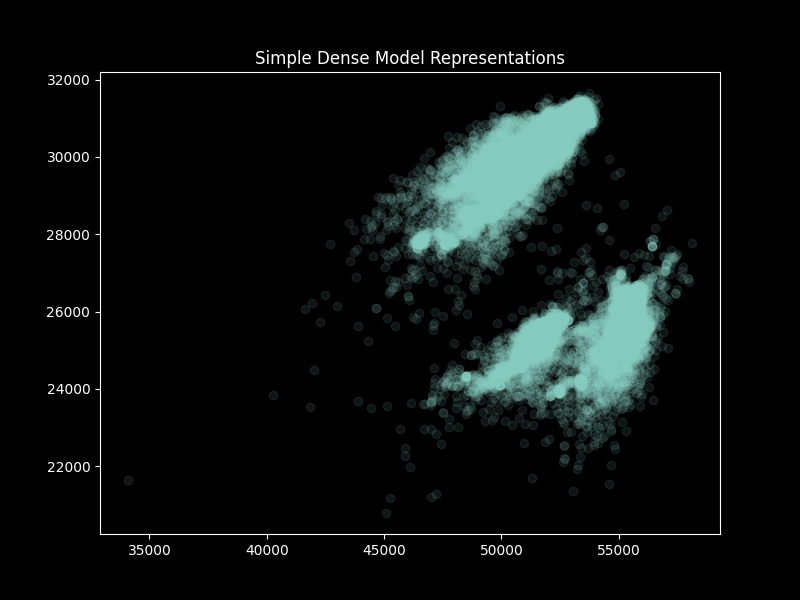

In [5]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(dense_reprs, "Simple Dense Model Representations", savepath='out.png', alpha=.1)
from IPython.display import Image
Image(filename='out.png')

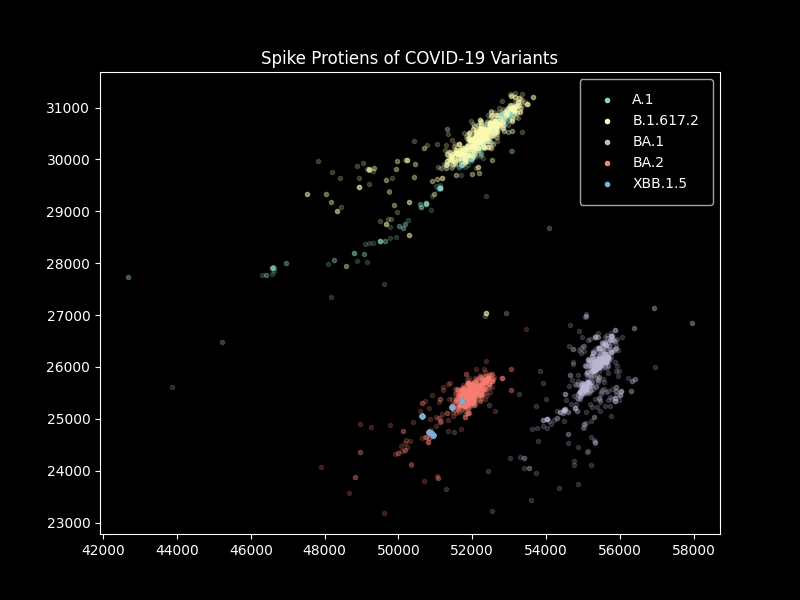

In [10]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Variant', 'A.1') | \
dataset['labels'].label_mask('Variant', 'B.1.617.2') | \
dataset['labels'].label_mask('Variant', 'BA.1') | \
dataset['labels'].label_mask('Variant', 'BA.2') | \
dataset['labels'].label_mask('Variant', 'XBB.1.5')
reprs_by_label(dense_reprs, dataset, 'Variant', 'Spike Protiens of COVID-19 Variants', mask=mask,
              savepath='out.png', alpha=.2, marker='.')
from IPython.display import Image
Image(filename='out.png')